In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pupilprep import preprocess_pupil

# files and settings:
filename = 'data/sub-01_block-01.asc'
params = {'lp':10, 'hp':0.01, 'order':3,
            'regress_xy':False, 'regress_blinks':True, 'regress_sacs':True}

# preprocess:
df, events, fs = preprocess_pupil.preprocess_pupil(filename, params)

Loading /Users/jwdegee/repos/pupilprep/data/sub-01_block-01.asc
Pixel coordinate data detected.Pass `scalings=dict(eyegaze=1e3)` when using plot method to make traces more legible.
Pupil-size area detected.
Interpolating missing data during blinks...
Interpolated 3 channels: ['xpos_left', 'ypos_left', 'pupil_left']
Removing 'BAD_' from BAD_blink.
Interpolating missing data during blinks...
Interpolated 3 channels: ['xpos_left', 'ypos_left', 'pupil_left']
Removing 'BAD_' from BAD_blink.
[(909397,), (909397,)]
explained variance = 5.52%


What variables are we working with?

In [14]:
print('events:\n{}'.format(events.head()))
print()
print('time-series:\n{}'.format(df.head()))
print()
print('sampling rate = {}Hz'.format(fs))

events:
   onset  duration                      description  \
0  0.007     0.075                         fixation   
1  0.079     0.000  start_type-stim_trial-0_phase-0   
2  0.082     0.039                          saccade   
3  0.121     0.188                         fixation   
4  0.309     0.027                          saccade   

                             ch_names  
0  (xpos_left, ypos_left, pupil_left)  
1                                  ()  
2  (xpos_left, ypos_left, pupil_left)  
3  (xpos_left, ypos_left, pupil_left)  
4  (xpos_left, ypos_left, pupil_left)  

time-series:
    time    xpos   ypos   pupil  xpos_int  ypos_int  pupil_int  pupil_int_lp  \
0  0.000  1362.9  590.1  1358.0    1362.9     590.1     1358.0   1358.028267   
1  0.001  1362.9  590.2  1358.0    1362.9     590.2     1358.0   1357.833797   
2  0.002  1362.8  590.3  1359.0    1362.8     590.3     1359.0   1357.633661   
3  0.003  1362.6  590.1  1359.0    1362.6     590.1     1359.0   1357.427948   
4  0.00

Let's first plot the raw pupil times series, and the blink-interpolated pupil time-series on top.

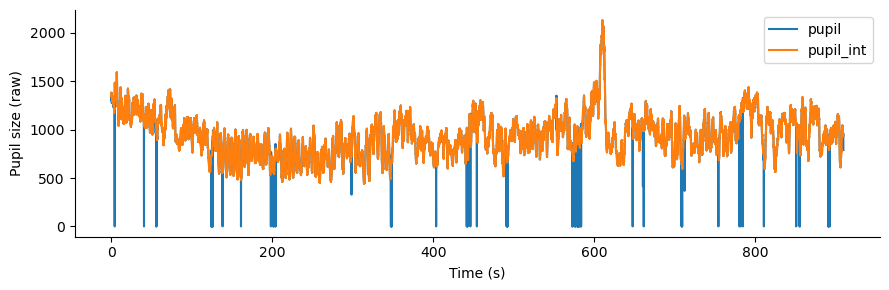

In [26]:
# plot:
fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
plt.plot(df['time'], df['pupil'], label='pupil')
plt.plot(df['time'], df['pupil_int'], label='pupil_int')
plt.xlabel('Time (s)')
plt.ylabel('Pupil size (raw)')
plt.legend()
plt.tight_layout()
sns.despine()

Let's zoom in on a blink

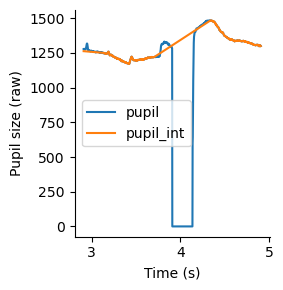

In [27]:
blinks = events.loc[events['description']=='blink']

ind = ((df['time']>(blinks['onset'].iloc[2]-1))&
       (df['time']<blinks['onset'].iloc[2]+1))

# plot:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
plt.plot(df.loc[ind,'time'], df.loc[ind,'pupil'], label='pupil')
plt.plot(df.loc[ind,'time'], df.loc[ind,'pupil_int'], label='pupil_int')
plt.xlabel('Time (s)')
plt.ylabel('Pupil size (raw)')
plt.legend()
plt.tight_layout()
sns.despine()


We typically apply a low-pass filter to remove some high frequency noise.

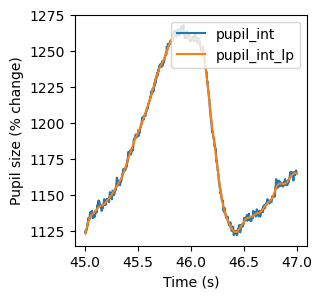

In [ ]:
ind = ((df['time']>45)&
       (df['time']<47))

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
plt.plot(df.loc[ind,'time'], df.loc[ind,'pupil_int'], label='pupil_int')
plt.plot(df.loc[ind,'time'], df.loc[ind,'pupil_int_lp'], label='pupil_int_lp')
plt.xlabel('Time (s)')
plt.ylabel('Pupil size (% change)')
plt.legend(loc=1)

The pupil size often shows a stereotypical response after blink. Let's plot that here.

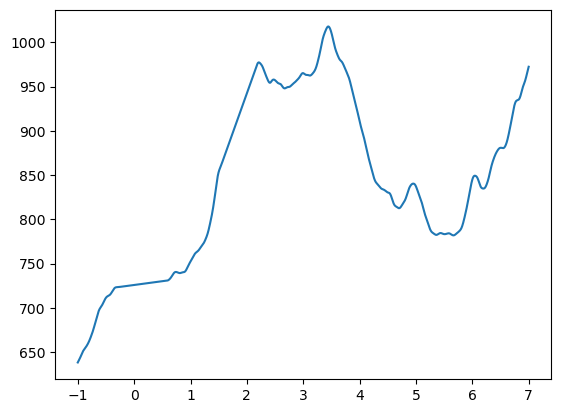

In [60]:
blinks_ = blinks.loc[blinks['onset'].diff()>5].reset_index(drop=True)
blinks_.loc[:,'offset'] = blinks_['onset']+blinks_['duration']

epochs = []
for i, b in enumerate(blinks_['offset']):
    ind = ((df['time']>(blinks_['offset'].iloc[2]-1))&
        (df['time']<blinks_['offset'].iloc[2]+7))
    epoch = df.loc[ind, ['time', 'pupil_int_lp']].reset_index(drop=True)
    epoch.loc[:,'time'] = epoch['time']-epoch['time'].min()-1
    epoch.loc[:,'epoch'] = i
    epochs.append(epoch)
epochs = pd.concat(epochs)

mean = epochs.groupby(['time'])['pupil_int_lp'].mean()
plt.plot(mean.index, mean)

In [ ]:
# plt.plot(df['time'], df['pupil_int_lp_psc'], label='pupil_int_lp_psc')
# plt.plot(df['time'], df['pupil_int_lp_clean_psc'], label='pupil_int_lp_clean_psc')
blinks.shape


(71, 4)